In [1]:
from sklearn.datasets import load_breast_cancer, load_digits, load_iris, load_wine, make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import scipy.stats as stats

import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from softpy.evolutionary import *
from functools import partial
import scipy
from copy import deepcopy, copy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [3]:
clf = SVC()

In [4]:
hyperparams = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": range(1,3),
    "gamma": stats.uniform(loc=0.001, scale=1/X.shape[0]).rvs,
    "shrinking": [True, False],
    "C": stats.uniform(loc=0.01, scale=1).rvs,
    "max_iter": range(100,1000)
}

discrete = [True, True, False, True, False, True]

update_distrib = [
    lambda x: np.random.choice(["linear", "poly", "rbf", "sigmoid"]) if np.random.rand() < 0.3 else x,
    lambda x: np.max([1, np.min([x + np.random.randint(-2, 2), 100])]),
    lambda x: np.max([0.01, np.min([x + stats.uniform(-0.1, 0.1).rvs(), 100])]),
    lambda x: np.random.choice([True, False]) if np.random.rand() < 0.3 else x,
    lambda x: np.max([0.01, np.min([x + stats.uniform(-0.1, 0.1).rvs(), 100])]),
    lambda x: x
]

In [5]:
def fitness(c: DictionaryCandidate, clf, X_train, y_train, X_val, y_val, debug=False):
    if debug:
        print(c.values)
    clf.set_params(**c.values)
    clf.fit(X_train, y_train)
    return accuracy_score(y_val, clf.predict(X_val))

In [6]:
genalgo_hyper = GeneticAlgorithm(pop_size=10,
                                candidate_type=DictionaryCandidate,
                                selection_func=partial(tournament_selection, tournament_size=5),
                                fitness_func=partial(fitness, X_train=X_train, y_train=y_train,
                                        X_val=X_val, y_val=y_val, clf=clf, debug=False),
                                elitism=False,
                                **{"names": list(hyperparams.keys()),
                                   "gens": list(hyperparams.values()),
                                   "discrete": discrete,
                                   "update_distrib": update_distrib}
                                )

In [7]:
iters = 10

genalgo_hyper.fit(iters, keep_history=True, show_iters=True)
history_f = genalgo_hyper.fitness_h
history_b = genalgo_hyper.best_h

0
1
2


/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=226).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=226).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=771).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=838).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-pack

3
4
5
6


/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-pack

7
8
9
10


/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/miniconda3/envs/ml/lib/python3.12/site-pack

(0.0, 10.0)

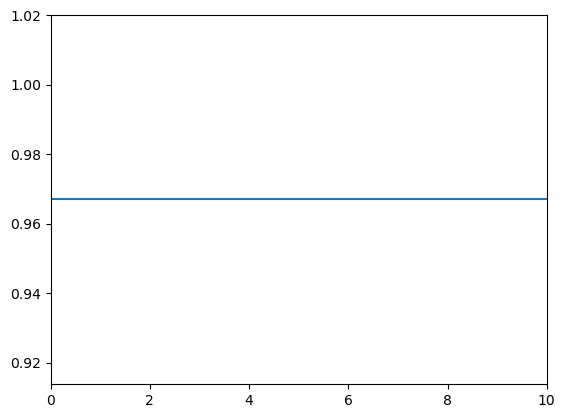

In [8]:
plt.plot(history_f)
plt.xlim(0,iters)

In [9]:
[c.values for c in history_b]

[{'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013408898549539022,
  'shrinking': True,
  'C': 0.340721837865965,
  'max_iter': 543},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.

In [10]:
clf.set_params(**history_b[-1].values)
clf.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
accuracy_score(y_test, clf.predict(X_test))

/home/andrea/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=543).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9210526315789473